### Install Requirements

In [1]:
import sys
!{sys.executable} -m pip install torch umap-learn matplotlib pandas datashader bokeh holoviews

### Load Trained Prototypical Networks Model

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import learn2learn as l2l


class Convnet(nn.Module):
    def __init__(self, x_dim=3, hid_dim=64, z_dim=64):
        super().__init__()
        self.encoder = l2l.vision.models.ConvBase(
            output_size=z_dim, hidden=hid_dim, channels=x_dim
        )
        self.out_channels = 1600

    def forward(self, x):
        x = self.encoder(x)
        return x.view(x.size(0), -1)
    
model = Convnet()
model.load_state_dict(torch.load("model_47.pt"))
model.to(torch.device("cpu"))

Convnet(
  (encoder): ConvBase(
    (0): ConvBlock(
      (normalize): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (1): ConvBlock(
      (normalize): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (2): ConvBlock(
      (normalize): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (3): ConvBlock(
      (normalize): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
  )
)

### Load MiniImagenet Test Dataset

In [4]:
from learn2learn.data.transforms import NWays, KShots, LoadData, RemapLabels

test_dataset = l2l.vision.datasets.MiniImagenet(
    root="../../data", mode="test", download=True
)

### Plot Original Images Flattened

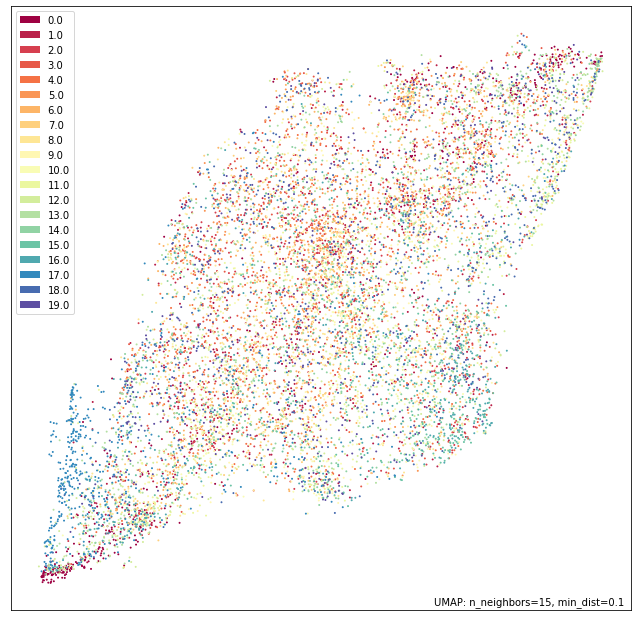

In [5]:
import umap
import umap.plot

mapper = umap.UMAP().fit(test_dataset.x.flatten(start_dim=1))
umap.plot.points(mapper, labels=test_dataset.y)

### Plot Original Images Flattened and PCA transformed

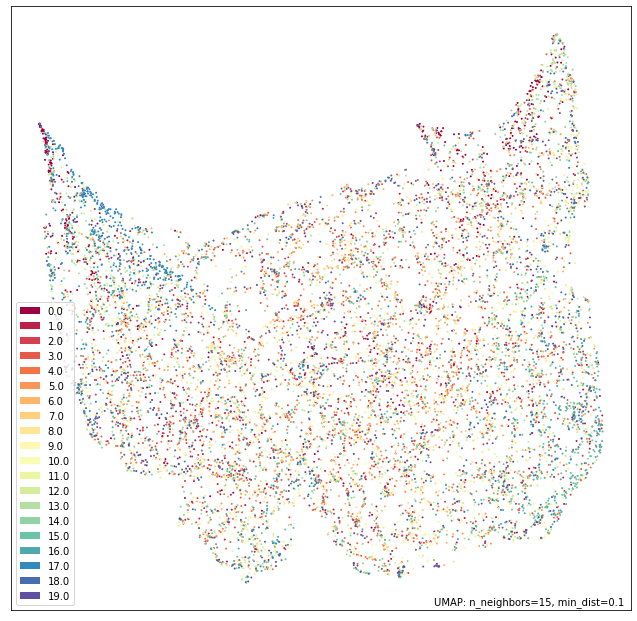

In [6]:
import sklearn

mapper = umap.UMAP().fit(sklearn.decomposition.PCA(n_components=4).fit_transform(test_dataset.x.flatten(start_dim=1)))
umap.plot.points(mapper, labels=test_dataset.y)

### Plot Original Images Transformed by Prototypical Networks and Flattened

Begin embedding
Finished embedding
Being UMAP
Finished UMAP


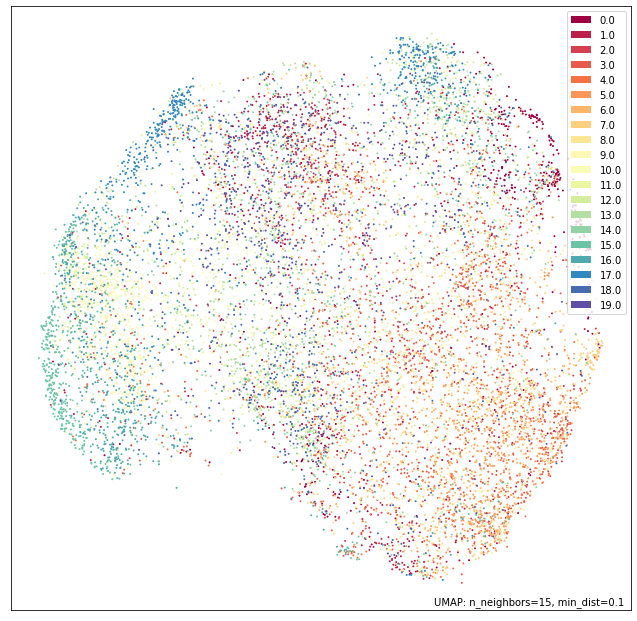

In [7]:
import sklearn

print("Begin embedding")
embedded_images = model(test_dataset.x).flatten(start_dim=1)
print("Finished embedding")
print("Being UMAP")
mapper = umap.UMAP().fit(embedded_images.detach().numpy())
print("Finished UMAP")
umap.plot.points(mapper, labels=test_dataset.y)

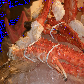

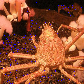

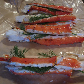

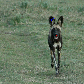

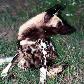

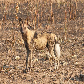

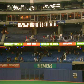

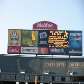

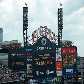

In [8]:
from torchvision import transforms
import PIL

for i in [1000, 1001, 1002, 3000, 3001, 3002, 9999, 10000, 10001]:
    im = transforms.ToPILImage()(test_dataset.x[i])
    display(PIL.ImageOps.invert(im))